# Guitar tuner

## Description

Single notes in wav files: string_1.wav, string_2.wav, string_3.wav

Guitar notes and corresponding frequencies:
- E1: 329.63 Hz
- B2: 246.94 Hz
- G3: 196.00 Hz
- D4: 146.83 Hz
- A5: 110.00 Hz
- E6: 82.41 Hz

Values of 1 cent for accuracy of each string: 0.15, 0.15, 0.15, 0.08, 0.08, 0.04

## Read the wave file

In [2]:
import numpy as np
import numpy.fft as nf
import matplotlib.pyplot as plt
import wave

In [18]:
'''
function wave_read: read the wave file and the corresponding parameters
'''
def wave_read(file_name):
    file = wave.open(file_name)
    params = file.getparams() # read the parameters
    nchannels, sampwidth, framerate, nframes = params[:4]
    
    # Reads the complete frame data into str_data, which is a string type
    str_data = file.readframes(nframes)
    # Convert the audio waveform data to an array
    wave_data =  np.frombuffer(str_data, dtype = np.short)
    
    # time is an array paired with wave_data
    time = np.arange(0,nframes) * (1.0/ framerate)
    
    return nchannels, sampwidth, framerate, nframes, wave_data, time

## spectral analysis

In [19]:
'''
function spectral_analysis: find the corresponding frequency of the string input

It should be noted that here we choose directly the frequency with the most highest value as the corresponding 
frequency that we are searching for. But it's not the case, for example for "string_2", so we need to compare 
and verify with the plotted spectrum.
'''
def spectral_analysis(wave_data, time, framerate):
    freqs = nf.fftfreq(wave_data.size, 1/framerate)
    pows = np.abs(nf.fft(wave_data))
    pows = np.abs(pows/pows.size) # normalisation
    
    # keep only frequencies between 0 and 1000
    freqs1 = freqs[np.where((freqs > 0)&(freqs < 1000))]
    pows1 = pows[np.where((freqs > 0)&(freqs < 1000))]
    
    # plot the spectrogram
    plt.figure(figsize = (10,5))
    plt.plot(freqs, pows)
    plt.xlabel("Freq(Hz)")
    plt.ylabel("Magnitude") 
    plt.title("Fourier Transform Power Spectrum")
    plt.show()
    
    # plot the spectrogram for frequency between 0 and 1000
    plt.figure(figsize = (10,5))
    plt.plot(freqs1, pows1)
    plt.xlabel("Freq (Hz)")
    plt.ylabel("Magnitude") 
    plt.title("Fourier Transform Power Spectrum")
    plt.show()
    
    # find the frequency corresponding to the maximum value of power
    max_idx = np.argmax(pows)
    freq = freqs[max_idx]
    
    return freq

## determine the played note with the accuracy in cent

In [20]:
'''
function determine_note_accuracy: find the played note with the accuracy in cent based on frequency
'''
def determine_note_accuracy(freq):
    notes = {329.63:"E1", 246.94:"B2", 196.00:"G3", 146.83:"D4", 110.00:"A5", 82.41:"E6"}
    accuracies = {329.63:0.15, 246.94:0.15, 196.00:0.15, 146.83:0.08, 110.00:0.08, 82.41:0.08}
    
    min_value = float('inf')
    note = None
    # find the corresponding note
    for key in notes.keys():
        if abs(freq - key) < min_value:
            note = notes[key]
            corres_freq = key
            min_value = abs(freq - key)
    
    accuracy = accuracies[corres_freq]
    cent = round(abs(freq - corres_freq)/accuracy, 2)
    
    return note, cent

## Results

In [21]:
def guitar_tuner(file_name):
    # read the file
    nchannels, sampwidth, framerate, nframes, wave_data, time = wave_read(file_name)
    
    # plot the wave in time domain
    plt.figure(figsize = (10,5))
    plt.plot(time, wave_data)
    plt.xlabel("Time(s)")
    plt.ylabel("Amplitude") 
    plt.title("Original wave of "+ file_name +" in time domain")
    plt.show()
    
    # spectrum analysis and find the frequency corresponding to the maximum value of power
    freq = spectral_analysis(wave_data, time, framerate)
    print("The corresponding frequency is "+ str(round(freq,2)) + " Hz.")
    
    # find the note and define the accuracy in cent
    note, cent = determine_note_accuracy(freq)
    
    print("The played note of "+ file_name +" is: "+ str(note))
    print("The accuracy in cent of "+ file_name +" is: "+ str(cent))
    

### Results for "string_1"

The results obtained for "string_1" is in the following:

In the first figure, we plotted in the first figure the original wave of "string_1" in the time domain.

In the seconde figure, we plotted the spectrum graph after the fourier tranform in the frequency domain.

In the third figure, we only plotted the spectrum between 0 and 1000 $Hz$. And we can see from this figure that the relationship between the three most significant frequencies are: $\nu_{1} = 2\nu_{0}$, $\nu_{2} = 3\nu_{0}$, where the most highest one(with the most power) is $\nu_{0} = 329.68 Hz$, which is the main corresponding frequency we are searching for. 

Then, we can know after calculation that the played note of string_1.wav is "E1" and its accuracy in cent comparing with the note "E1"($329.63 Hz$) is $0.34$.

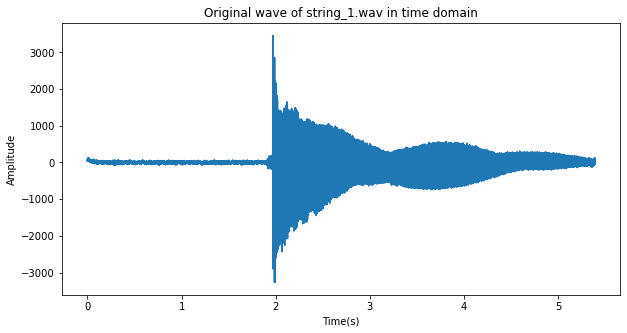

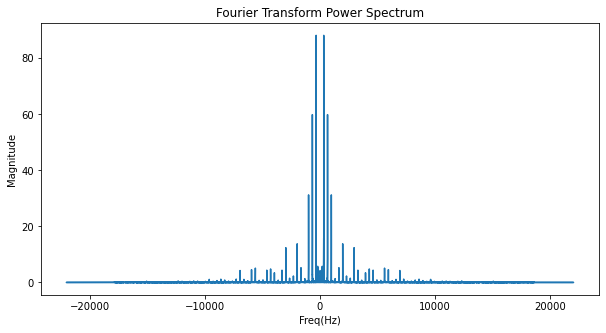

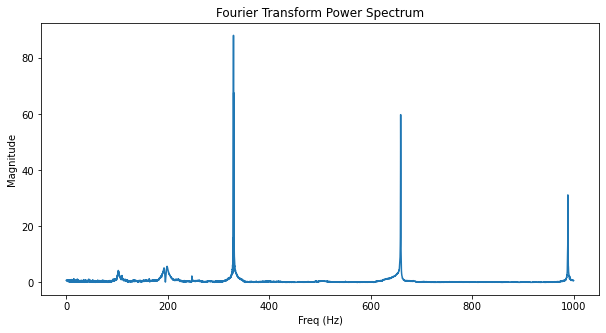

The corresponding frequency is 329.68 Hz.
The played note of string_1.wav is: E1
The accuracy in cent of string_1.wav is: 0.34


In [22]:
guitar_tuner("string_1.wav")

### Results for "string_2"

The results obtained for "string_2" is in the following:

In the first figure, we plotted in the first figure the original wave of "string_2" in the time domain.

In the seconde figure, we plotted the spectrum graph after the fourier tranform in the frequency domain.

In the third figure, we plotted the spectrum between 0 and 1000. And we can see from this figure that there are four most significant frequencies with following relationship: $\nu_{1} = 2\nu_{0}$, $\nu_{2} = 3\nu_{0}$, $\nu_{3} = 5\nu_{0}$. Here it is worth noting that the hight of the first wave peak is lower than that of the second one, but its width is much wider, so we need to determine which one has more power and is the main corresponding frequency that we are searching for. Moreover, We have already obtained the frequency for the second wave peak of $392.15 Hz$(see the following), which has a large difference from the value of the all the 6 notes we are looking for. So considering the multiplicative relationship between the frequencies, we tried to look for the half of 392.15: $\nu_{0} = 392.15/2 = 196.08 Hz$, which is actually the first peak in the FFT Spectrum. The corresponding played note is "G3", and the accuracy in cent is $(196.08-196)/0.15 = 0.53$. 

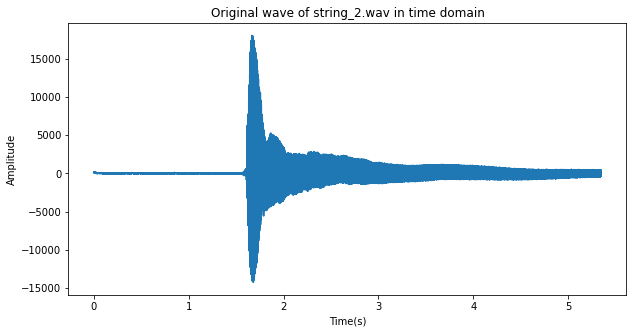

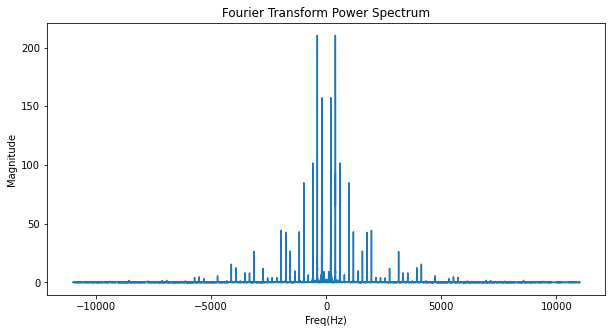

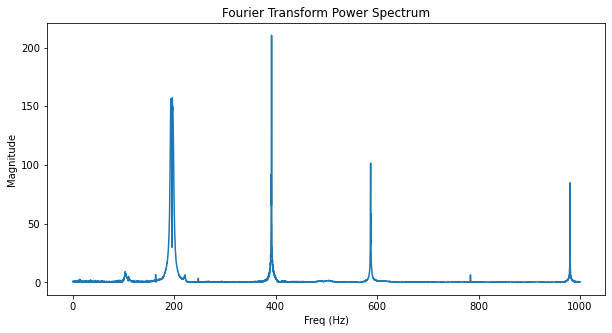

The corresponding frequency is 392.15 Hz.
The played note of string_2.wav is: E1
The accuracy in cent of string_2.wav is: 416.78


In [23]:
guitar_tuner("string_2.wav")

### Results for string_3

The results obtained for "string_3" is following:

In the first figure, we plotted in the first figure the original wave of string_3 in the time domain.

In the seconde figure, we plotted the spectrum graph after the fourier tranform in the frequency domain.

In the third figure, we plotted the spectrum between 0 and 1000. And we can see from this figure that the relationship between the four most significant frequencies are: $\nu_{1} = 2\nu_{0}$, $\nu_{2} = 3\nu_{0}$, $\nu_{3} = 5\nu_{0}$, where the most highest one(with the most de power) is $\nu_{0} = 110.12 Hz$, which is the main corresponding frequency we are searching for.

Then, we can know after calculation that the played note of string_3 is "A5" and its accuracy in cent comparing with the note "A5"($110.00 Hz$) is $1.53$, which is a little higher than the first two strings.

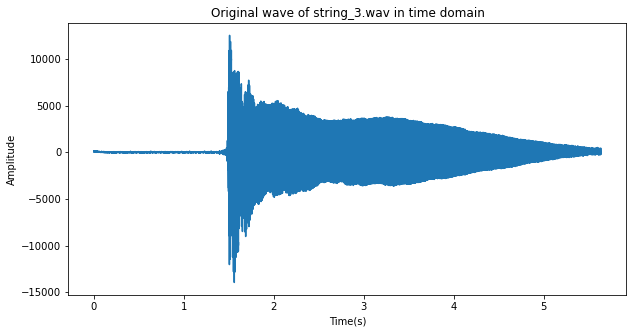

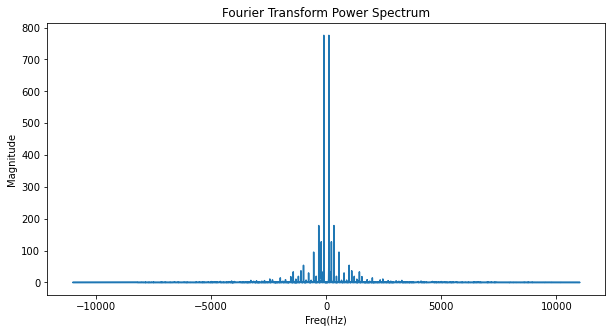

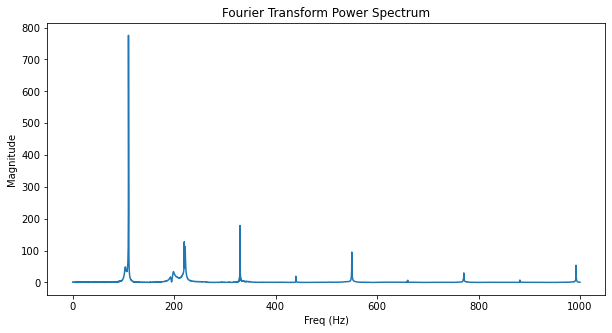

The corresponding frequency is 110.12 Hz.
The played note of string_3.wav is: A5
The accuracy in cent of string_3.wav is: 1.53


In [24]:
guitar_tuner("string_3.wav")

# Zoom in images

## Description

For a given image:

- Perform a spectral analysis
- Resize the image to get a smaller image of half size
(1) in the space domain by subsampling
(2) by resizing in the Fourier domain
- Resize the image to get a bigger image of double size
(1) by sinc interpolation (zero padding in the Fourier domain)
(2) by linear interpolation in the space domain

The image used is shown in the follwing, it's a RGB image with three channels.

In [25]:
import matplotlib.pyplot as plt
import cv2

In [26]:
img = cv2.imread('barbara.jpg')
img.shape

(512, 512, 3)

Text(0.5, 1.0, 'Original image')

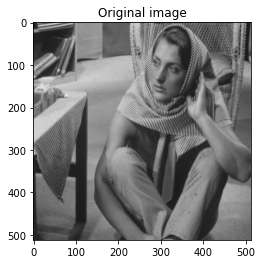

In [27]:
plt.imshow(img)
plt.title('Original image')

## Perform a spectral analysis

Because the original image is a 3-channels image, we need to do the spectural analysis on a single channel. So we read directly the gray image with only a single channel. For the following part, I always used the gray scale image.

In [28]:
def img_specturm(img):
    freq = nf.fft2(img)
    # decenteralisation, move the lower frequencies to the middle and the higher frequencies on the sides
    fshift = nf.fftshift(freq)
    fimg = np.log(np.abs(fshift))
    return fimg

Text(0.5, 1.0, 'Fourier Transform on single channel')

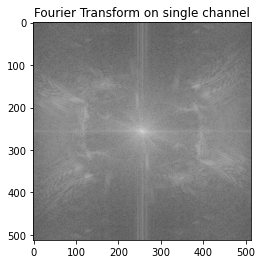

In [29]:
gray_img = cv2.imread('barbara.jpg', 0) # read the gray image
gray_fimg = img_specturm(gray_img)

plt.imshow(gray_fimg, 'gray')
plt.title('Fourier Transform on single channel')

## Resize the image to half size

### in the space domain by subsampling

**Principle of subsampling**: for an image I size M * N, s times downsampling, that is, to get (M / s) * (N / s) size of the resolution image. If considering the matrix form of the image, that's to say transfer the original region of s * s window into a pixel, the value of this pixel point is the average value of all pixels in the window.

In [30]:
def subsampling(img, s):
    hight = img.shape[0]
    width = img.shape[1]

    new_hight = hight // s
    new_width = width // s
    
    sub_img = np.zeros((new_hight,new_width))
    
    # calculate the pixel value in a s*s window
    for i in range(new_hight):
        for j in range(new_width):
            sum_pixels = 0
            
            for m in range(s):
                for n in range(s):
                    sum_pixels += img[i*s+m][j*s+n]
            
            sub_img[i][j] = sum_pixels//(s*s) 
            
    return sub_img

Text(0.5, 1.0, 'half-size image after subsampling')

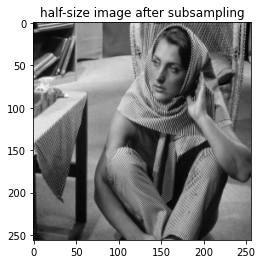

In [31]:
sub_img = subsampling(gray_img, 2)

plt.imshow(sub_img,'gray')
plt.title('half-size image after subsampling')

### by resizing in the Fourier domain

In [32]:
def fourier_resize(img):
    hight = img.shape[0]
    width = img.shape[1]

    hight_start = hight // 4
    hight_end = hight_start + hight // 2 
    width_start = width // 4
    width_end = width_start + width // 2

    freq = nf.fft2(img)
    fshift = nf.fftshift(freq)

    new_fshift = fshift[hight_start:hight_end,width_start:width_end]

    new_f = nf.ifftshift(new_fshift)
    if_img = nf.ifft2(new_f)
    
    new_img = np.abs(if_img)
    
    return new_img


Text(0.5, 1.0, 'half-size image by resizing in the Fourier domain')

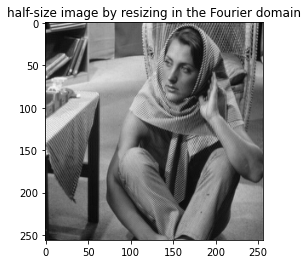

In [33]:
f_img= fourier_resize(gray_img)

plt.imshow(f_img, 'gray')
plt.title('half-size image by resizing in the Fourier domain')

## Resize the image to double size

### By linear interpolation in the space domain

Text(0.5, 1.0, 'double-size image by linear interpolation')

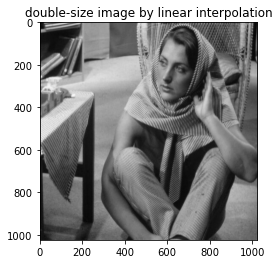

In [34]:
line_interp_img = np.zeros((gray_img.shape[0]*2, gray_img.shape[1]*2))
line_interp_img= cv2.resize(gray_img, dsize=(gray_img.shape[0]*2, gray_img.shape[1]*2), interpolation=cv2.INTER_LINEAR)

plt.imshow(line_interp_img,'gray')
plt.title('double-size image by linear interpolation')

### By sinc interpolation (zero padding in the Fourier domain)

In [35]:
def sinc_interpolation(img, n):
    hight = img.shape[0]
    width = img.shape[1]
    
    val1 = (n-1) * hight // 2
    val2 = (n-1) * hight - val1
    val3 = (n-1) * width // 2
    val4 = (n-1) * width - val3
    
    # fourier transform
    f_img = nf.fft2(img)
    f_shift = nf.fftshift(f_img)
    
    # zero padding
    new_f = np.pad(f_shift, ((val1,val2),(val3,val4)))
    
    # inverse fourier transform
    new_f = nf.ifftshift(new_f)
    if_img = nf.ifft2(new_f)
    new_img = np.abs(if_img)

    return new_img

Text(0.5, 1.0, 'double-size image by sinc interpolation')

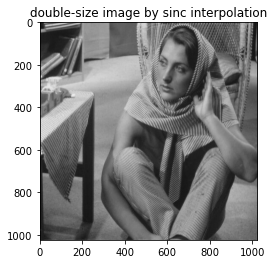

In [36]:
sinc_img= sinc_interpolation(gray_img, 2)
plt.imshow(sinc_img, 'gray')
plt.title('double-size image by sinc interpolation')

## Comparison

We put the four new generated image together and we can find that by resizing the image in half size, its resolution is decreasing and the stripe on her clothes and scarf is less continuous. On the contrary, by interpolation method, we could increase resolution of image, and the stripe is more continuous. 
Here, it's not very obvious because we just resized the image into half-size or double size, if we resize it by a greater multiple, it will be more obvious to observe the change.

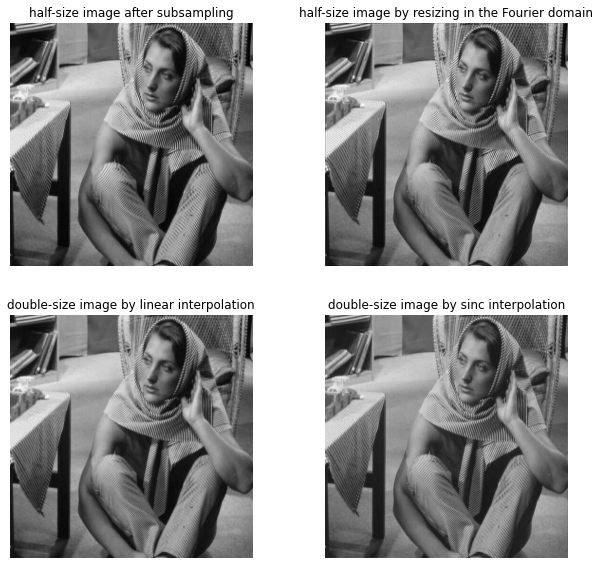

In [37]:
figure, ax = plt.subplots(nrows = 2,ncols = 2, figsize = (10,10))

ax.ravel()[0].imshow(sub_img, 'gray')
ax.ravel()[0].set_title('half-size image after subsampling')
ax.ravel()[0].set_axis_off()

ax.ravel()[1].imshow(f_img, 'gray')
ax.ravel()[1].set_title('half-size image by resizing in the Fourier domain')
ax.ravel()[1].set_axis_off()

ax.ravel()[2].imshow(line_interp_img, 'gray')
ax.ravel()[2].set_title('double-size image by linear interpolation')
ax.ravel()[2].set_axis_off()

ax.ravel()[3].imshow(sinc_img, 'gray')
ax.ravel()[3].set_title('double-size image by sinc interpolation')
ax.ravel()[3].set_axis_off()

plt.subplots_adjust(left=0.125,
                    bottom=0.125, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.1)

plt.show()